In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer

In [3]:
df = pd.read_csv("./WineQT.csv")[:100]
df.drop(["Id","quality"], axis= 1, inplace= True)

In [4]:
norm = Normalizer()

df_np = norm.transform(df)

c:\Users\ashua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [5]:
def e_distance(feature, sample):
    number = sum((feature - sample)**2)
    number = number**(1/2)
    
    return number

{0: {'center': array([0.12658088, 0.01122652, 0.00165761, 0.02863139, 0.00135622,
         0.24110644, 0.94935662, 0.01501641, 0.0480706 , 0.01235671,
         0.14466387]),
  'cluster': []},
 1: {'center': array([6.22513884e-02, 3.54688143e-03, 2.02678939e-03, 1.37532137e-02,
         7.96238689e-04, 1.44770671e-01, 9.84440561e-01, 7.21826564e-03,
         2.12089033e-02, 1.41151404e-02, 7.16614820e-02]),
  'cluster': []}}

In [301]:
# initializing k




In [438]:


for j in range(1000):
    k = 3
    
    least_variance = 1000

    data = {}
    for i in range(k):
        data[i] = {}
        data[i]["center"] = df_np[np.random.randint(0, len(df_np))]
        data[i]["cluster"] = []


    converged = False
    for epoch in range(10):
        # iterate over the dataset rows
        for i in range(len(df_np)):
            distances = []
            # compare distance of the point to all cluster's centers
            for cluster in data:
                distances.append(e_distance(df_np[i], data[cluster]["center"]))
            # assign the point to closer clusters and append it to the list
            
            cluster_assignment = distances.index(min(distances))
            data[cluster_assignment]["cluster"].append(df_np[i])
            
        for key in data:
            cluster_data = data[key]
            
            # FIND THE Centeroid of the cluster
            cluster_sum = sum(cluster_data["cluster"])
            
            try:
                centeroid = cluster_sum/ len(cluster_data["cluster"])    
            except:
                centeroid = data[key]["center"]
            
            if data[key]["center"].all() == centeroid.all():
                # print("Converged")
                converged = True
                break
            
            data[key]["center"] = centeroid
            
        # variance of the clustering
        final_variance = 0
        
        # print(f"\nEpoch : {epoch+1}")
        for key in data:
            cluster_data = data[key]
            
            total_variance = 0
            for point in cluster_data["cluster"]:
                variance = ((cluster_data["center"] - point)**2).sum()
                total_variance += variance
            
            # print(f"Cluster: {key}, Variance: {total_variance}")
            
            final_variance += total_variance
            
            data[key]["cluster"] = []
        
        if converged:
            break

    if final_variance < least_variance:
        least_variance = final_variance
        
        for i in range(len(df_np)):
            distances = []
            # compare distance of the point to all cluster's centers
            for cluster in data:
                distances.append(e_distance(df_np[i], data[cluster]["center"]))
            # assign the point to closer clusters and append it to the list
            
            cluster_assignment = distances.index(min(distances))
            data[cluster_assignment]["cluster"].append(df_np[i])
    
    
print(f"k = {k}, Variation: {least_variance}")

k = 3, Variation: 1.8797968958553348


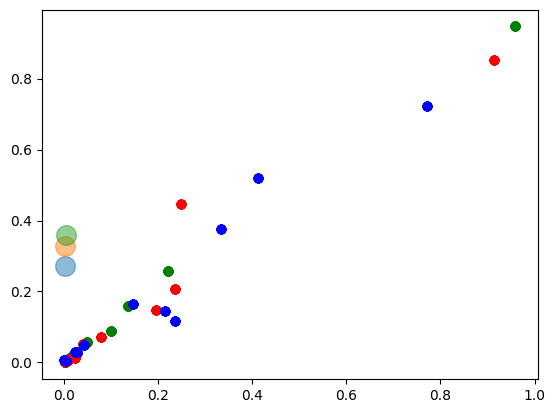

In [441]:
colors = ["green","red","blue","yellow"]
axis = [4 ,5]

for key in data:
    cluster_data = data[key]
    points = cluster_data["cluster"]
    
    x_points = []
    y_points = []
    plt.scatter(x=cluster_data["center"][axis[0]], y = cluster_data["center"][axis[1]], s=200, alpha=0.5)
    
    for point in points:
        x_points.append(points[axis[0]])
        y_points.append(points[axis[1]])

    plt.scatter(x=x_points, y = y_points, c=colors[key])
plt.show()

In [ ]:
[
    [2, 2.4],
    [3, 1.8], 
    [4, 1.3] 
]